In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_sub = pd.read_csv('/Users/akarberkin/Downloads/nyserda_solar_installations_subsidized.csv')


<ipython-input-3-eaa33483e1df>:1: DtypeWarning: Columns (1,3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sub = pd.read_csv('/Users/akarberkin/Downloads/nyserda_solar_installations_subsidized.csv')


In [4]:
df_sub

,Reporting Period,Project Number,Legacy Project Number,Street Address,City,County,State,ZIP Code,Incorporated Municipality,Municipality Type,Census Tract,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Minority or Women Owned Business Enterprise (MWBE),Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Affordable Solar Residential Adder,Affordable Multifamily Housing Incentive,Community Adder,Inclusive Community Solar Adder,Expanded Solar For All Adder,Brownfield/Landfill Adder,Canopy Adder,Prevailing Wage Adder,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Community Distributed Generation,Green Jobs Green New York Participant,Latitude,Longitude,Georeference
0,07/31/2023,0000577626,NaN,NaN,AMAGANSETT,Suffolk,NY,11930,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,04/07/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
1,07/31/2023,0000540989,NaN,NaN,Aquebogue,Suffolk,NY,11931,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,05/13/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
2,07/31/2023,0000623055,NaN,NaN,Brooklyn,Kings,NY,11234,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,07/22/2023,NaN,Pipeline,NaN,No,Delta Electronics,E6-TL-US [240V],1.0,Trina Solar,TSM-390DE09C.07,21.0,15935.00,1638.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,8.19,10408.0,NaN,No,No,NaN,NaN,NaN
3,07/31/2023,0000569864,NaN,NaN,East Amherst,Erie,NY,14051,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,National Grid,Purchase,05/06/2023,NaN,Pipeline,NaN,No,Enphase Energy Inc.,IQ8PLUS-72-2-US [240V],24.0,REC Solar,REC405AA Pure,24.0,30618.00,2916.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.72,11303.0,NaN,No,No,NaN,NaN,NaN
4,07/31/2023,0000604674,NaN,NaN,Elmont,Nassau,NY,11003,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,06/22/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153918,07/31/2023,0000024784,4884-37066,214 N Highland Ave,Ossining,Westchester,NY,10562,Ossining,Town,3.611901e+10,Non-Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Power Purchase Agreement,12/03/2013,06/13/2016,Complete,IPPsolar LLC (formerly Blueland LLC),No,Power-One,PVI-10.0-I-OUTD-x-US-208-y,3.0,Trina Solar,TSM-235PA05,154.0,145875.00,41849.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,36.39,43316.0,Yes,No,No,41.173234,-73.866223,POINT (-73.866222522 41.173233574)
153919,07/31/2023,0000460539,NaN,NaN,Flushing,Queens,NY,11358,New York,City,3.608111e+10,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Purchase,05/04/2022,06/09/2022,Complete,Surf Clean Energy Inc,No,Enphase Energy Inc.,IQ7A-72-2-US [240V],10.0,Hanwha Q CELLS,Q.PEAK DUO L-G6.2 425,10.0,38215.00,3400.0,2550.0,0.0,0.0,0.0,0,0.0,0.0,0.0,4.25,5142.0,NaN,No,Yes,40.764230,-73.790627,POINT (-73.7906266 40.7642305)
153920,07/31/2023,0000068558,NaN,NaN,North Branch,Sullivan,NY,12766,Callicoon,Town,3.610595e+10,Residential,Residential/Small Commercial,PON 2112,NYS Electric and Gas,Purchase,09/21/2016,05/25/2017,Complete,Renewable Energy Solutions (dba for Black Cherry),No,Altenergy Power System,YC500I (240V),14.0,Silfab,SLA280M,28.0,29000.00,5536.0,2400.0,0.0,0.0,0.0,0,0.0,0.0,0.0,7.84,8937.0,NaN,No,No,41.835839,-74.924132,POINT (-74.9241319 41.8358392)
153921,07/

In [5]:
df_sub_fin = df_sub[['Project Number', 'ZIP Code', 'Date Completed', 'Total PV Module Quantity' ,'Project Cost','Total NYSERDA Incentive','Expected KWh Annual Production']]
df_sub_fin = df_sub_fin.dropna()

In [6]:
df_sub_fin['grant_perc_of_all_project'] = df_sub_fin['Total NYSERDA Incentive']/df_sub_fin['Project Cost']

In [7]:
df_sub_fin.rename(columns={'ZIP Code': 'zip_code'}, inplace = True)

In [8]:
df_sub_fin

,Project Number,zip_code,Date Completed,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,grant_perc_of_all_project
13,0000049010,13760,10/12/2010,24.0,30000.00,11560.0,5353.0,0.385333
16,0000306878,14034,09/22/2021,18.0,20347.20,2268.0,6160.0,0.111465
24,2014-648248-Sola,11518,09/25/2014,28.0,23950.00,3393.0,8217.0,0.141670
26,2013-539131-Sola,11572,10/08/2014,35.0,20000.00,5369.0,13763.0,0.268450
27,2013-537428-Sola,11783,06/05/2014,24.0,30000.00,6489.0,7043.0,0.216300
...,...,...,...,...,...,...,...,...
153918,0000024784,10562,06/13/2016,154.0,145875.00,41849.0,43316.0,0.286883
153919,0000460539,11358,06/09/2022,10.0,38215.00,3400.0,5142.0,0.088970
153920,0000068558,12766,05/25/2017,28.0,29000.00,5536.0,8937.0,0.190897
153921,0000051796,12047,03/04/2011,98.0,249884.00,38588.0,20974.0,0.154424


In [9]:
df_sub_fin['zip_code'] = df_sub_fin['zip_code'].apply(lambda x: str(x)[:5])

In [10]:
df_sub_grouped_sum = df_sub_fin.groupby('zip_code')[['Total PV Module Quantity' ,'Total NYSERDA Incentive', 'grant_perc_of_all_project','Expected KWh Annual Production']].mean()

In [11]:
count_df_sub = df_sub_fin.groupby('zip_code')['Project Number'].count()

In [12]:
df_sub_group = pd.merge(df_sub_grouped_sum,count_df_sub,on='zip_code', how='inner')
df_sub_group.rename(columns={'Total PV Module Quantity': 'Average of Total PV Module Quantity that are Subsidized',
                             'Total NYSERDA Incentive': 'Average of Total NYSERDA Incentive',
                             'grant_perc_of_all_project': 'Percentage of the cost of project covered by incentive',
                             'Expected KWh Annual Production': 'Expected KWh Annual Production for Subsidized panels',
                            'Project Number': 'Subsidized Number of Projects'}, inplace=True)

In [13]:
df_sub_group

,Average of Total PV Module Quantity that are Subsidized,Average of Total NYSERDA Incentive,Percentage of the cost of project covered by incentive,Expected KWh Annual Production for Subsidized panels,Subsidized Number of Projects
zip_code,,,,,
00379,12.000000,840.000000,0.037559,4752.000000,1
10001,93.500000,26202.000000,0.164296,32085.500000,2
10002,120.666667,38731.083333,0.225613,53422.166667,12
10003,37.714286,5716.285714,0.102873,16309.142857,7
10004,132.000000,37773.000000,0.247529,40227.000000,1
...,...,...,...,...,...
14898,40.333333,4645.000000,0.121318,13768.000000,3
14901,133.909091,23457.181818,0.222730,46493.636364,11
14903,134.551724,22828.275862,0.164575,45882.793103,29


In [14]:
df_census = pd.read_csv('/Users/akarberkin/Downloads/ACSST5Y2021.S1901_2023-09-26T150758/ACSST5Y2021.S1901-Data.csv')

In [15]:
df_census = df_census[['NAME', 'S1901_C01_001E', 'S1901_C01_012E', 'S1901_C01_013E', 'S1901_C01_002E', 'S1901_C01_003E', 'S1901_C01_004E']]
df_census.columns = df_census.iloc[0]
df_census = df_census[1:]
df_census['ZIP Code'] = df_census['Geographic Area Name'].apply(lambda x: x[-5:])
df_census.rename(columns={'ZIP Code':'zip_code'}, inplace = True)

In [16]:
df_census.set_index('zip_code', inplace=True)

In [17]:
df_census.rename(columns={'Estimate!!Households!!Total': 'Estimated Total Households',
                      "Estimate!!Households!!Median income (dollars)": "Estimated Median Income for a household ($)",
                      "Estimate!!Households!!Mean income (dollars)" : "Estimated Mean Income for a household($)",
                    'Estimate!!Households!!Total!!Less than $10,000' : 'Percentage of households with income less than $10K',
                    df_census.columns[-2] : 'Percentage of households with income $10-15K', 
                    df_census.columns[-1] : 'Percentage of households with income $15-25K'}, inplace = True)

In [18]:
total_index = pd.concat([pd.Series(df_census.index), pd.Series(df_sub_group.index)])
df_census.index = pd.Series(df_census.index).apply(lambda x:int(x))
df_sub_group.index = pd.Series(df_sub_group.index).apply(lambda x:int(x))

In [19]:
indexes = set(df_sub_group.index).intersection(df_census.index)

In [20]:
merged_df = pd.merge(df_sub_group, df_census, on='zip_code', how = 'left')

In [21]:
merged_df = merged_df[merged_df['Percentage of households with income less than $10K']!='-']

In [22]:
merged_df.drop(columns=['Geographic Area Name'], inplace=True)

In [23]:
merged_df.dropna(inplace=True)

In [24]:
merged_df['Percentage of households with income less than $10K'] = merged_df['Percentage of households with income less than $10K'].apply(lambda x: float(x))
merged_df['Percentage of households with income $10-15K'] = merged_df['Percentage of households with income $10-15K'] .apply(lambda x: float(x))
merged_df['Percentage of households with income $15-25K'] = merged_df['Percentage of households with income $15-25K'].apply(lambda x: float(x))

In [25]:
merged_df['Percentage of households with income less than $25K'] = merged_df['Percentage of households with income less than $10K'] + merged_df['Percentage of households with income $10-15K'] + merged_df['Percentage of households with income $15-25K']

In [26]:
merged_df.rename(columns={'zip_code' : 'ZIP_CODE'},inplace=True)

In [27]:
merged_df

,Average of Total PV Module Quantity that are Subsidized,Average of Total NYSERDA Incentive,Percentage of the cost of project covered by incentive,Expected KWh Annual Production for Subsidized panels,Subsidized Number of Projects,Estimated Total Households,Estimated Median Income for a household ($),Estimated Mean Income for a household($),Percentage of households with income less than $10K,Percentage of households with income $10-15K,Percentage of households with income $15-25K,Percentage of households with income less than $25K
zip_code,,,,,,,,,,,,
10001,93.500000,26202.000000,0.164296,32085.500000,2,14273,101409,170154,7.2,3.4,5.4,16.0
10002,120.666667,38731.083333,0.225613,53422.166667,12,34737,37093,76115,13.0,11.8,12.9,37.7
10003,37.714286,5716.285714,0.102873,16309.142857,7,25181,137533,222765,6.8,2.2,3.3,12.3
10004,132.000000,37773.000000,0.247529,40227.000000,1,2113,216017,317203,2.2,0.0,0.9,3.1
10007,54.000000,54337.000000,0.198021,7753.000000,1,3246,"250,000+",444574,2.9,1.6,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
14898,40.333333,4645.000000,0.121318,13768.000000,3,559,48281,67776,4.5,1.1,14.3,19.9
14901,133.909091,23457.181818,0.222730,46493.636364,11,5440,35417,51814,15.7,8.6,11.5,35.8
14903,134.551724,22828.275862,0.164575,45882.793103,29,3121,61418,100790,6.4,4.0,8.3,18.7


In [33]:
merged_df.index = merged_df.index.astype(str)


In [28]:
import pyogrio

In [34]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file('/Users/akarberkin/Downloads/ZIP_CODE_040114/ZIP_CODE_040114.shp')


# Merge the GeoDataFrame with your data
gdf = gdf.merge(merged_df,left_on='ZIPCODE', right_on='zip_code')

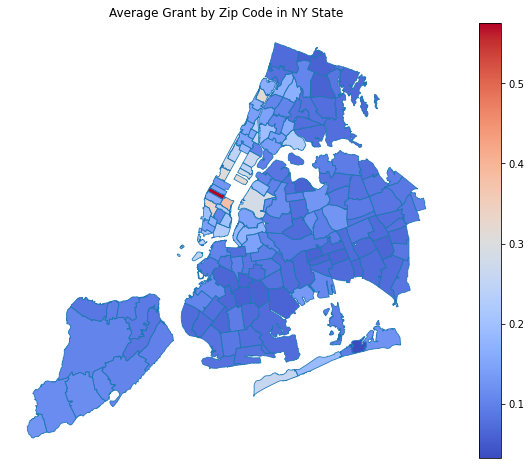

In [36]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zip code boundaries
gdf.boundary.plot(ax=ax, linewidth=0.8)

# Color the zip code polygons based on average grant values
gdf.plot(column='Percentage of the cost of project covered by incentive', cmap='coolwarm', legend=True, ax=ax)

# Add a title
plt.title('Average Grant by Zip Code in NY State')

# Show the plot
plt.axis('off')
plt.show()

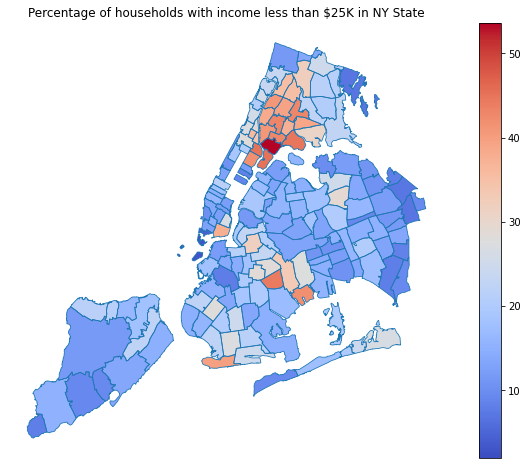

In [37]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zip code boundaries
gdf.boundary.plot(ax=ax, linewidth=0.8)

# Color the zip code polygons based on average grant values
gdf.plot(column='Percentage of households with income less than $25K', cmap='coolwarm', legend=True, ax=ax)

# Add a title
plt.title('Percentage of households with income less than $25K in NY State')

# Show the plot
plt.axis('off')
plt.show()

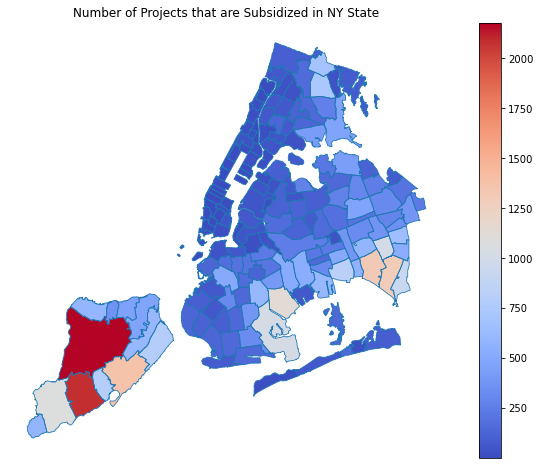

In [38]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zip code boundaries
gdf.boundary.plot(ax=ax, linewidth=0.8)

# Color the zip code polygons based on average grant values
gdf.plot(column='Subsidized Number of Projects', cmap='coolwarm', legend=True, ax=ax)

# Add a title
plt.title('Number of Projects that are Subsidized in NY State')

# Show the plot
plt.axis('off')
plt.show()